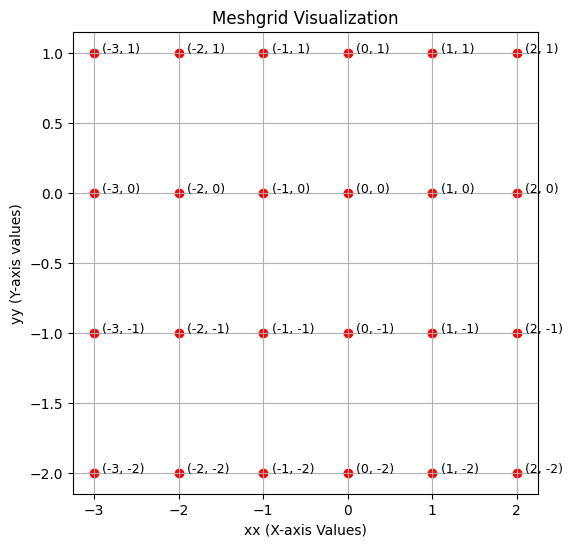

In [66]:
# Understanding Meshgrids

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 1)
y = np.arange(-2, 2, 1)

# Create a meshgrid 
xx, yy = np.meshgrid(x, y)

# Visualize the grid points 
plt.figure(figsize=(6, 6))
plt.scatter(xx, yy, c='red', marker='o')

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        plt.text(xx[i, j] + 0.1, yy[i, j], f"({xx[i, j]}, {yy[i, j]})", fontsize=9)

plt.title('Meshgrid Visualization')
plt.xlabel('xx (X-axis Values)')
plt.ylabel('yy (Y-axis values)')
plt.grid(True)
plt.show()

## Decision Tree in Classification

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score

In [68]:
# Load iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
X = iris.data[:, :2]  # We only considered the first 2 features 
y = iris.target

X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
# Split the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


In [72]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=40)

In [73]:
# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8


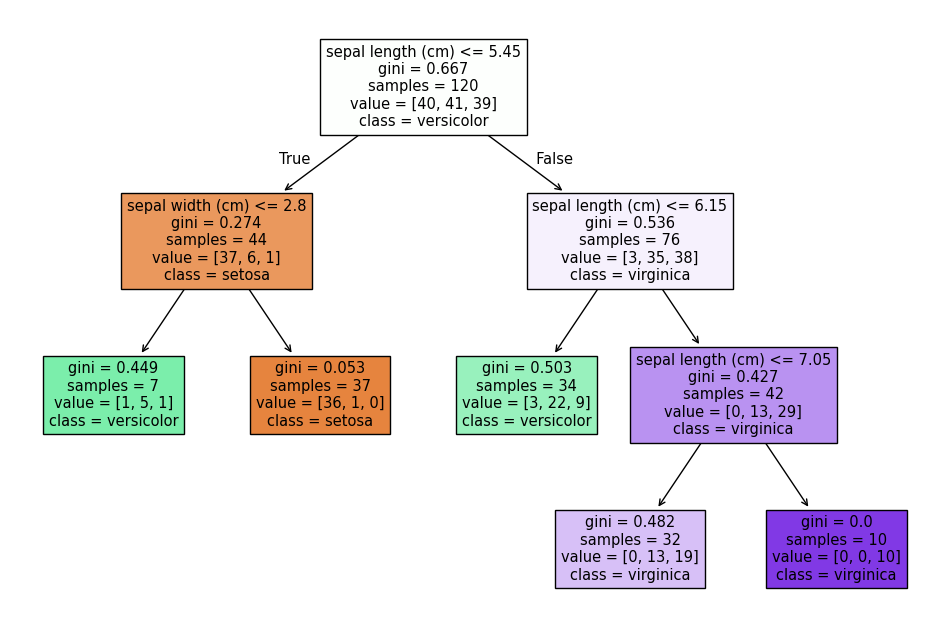

In [74]:
# plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

In [75]:
# Plotting the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

xx

array([[3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       ...,
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89]])

<Figure size 800x600 with 0 Axes>

In [76]:
xx.shape

(440, 560)

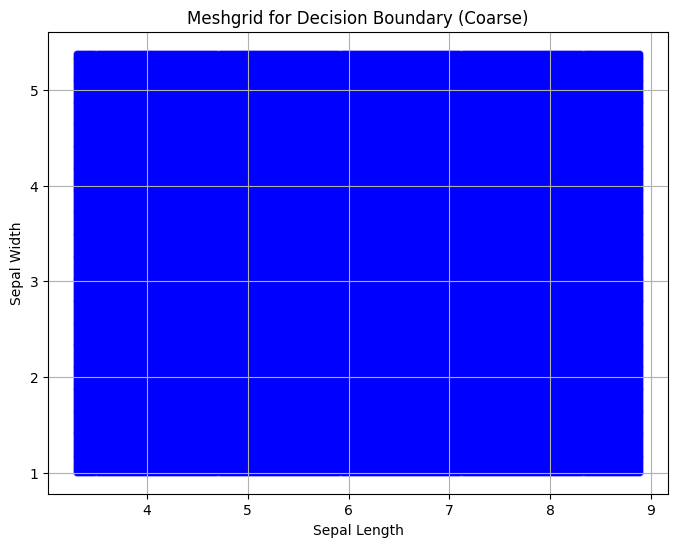

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(xx, yy, s=10, color='blue', alpha=0.5)
plt.title('Meshgrid for Decision Boundary (Coarse)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()

In [78]:
np.c_[xx.ravel(), yy.ravel()]

array([[3.3 , 1.  ],
       [3.31, 1.  ],
       [3.32, 1.  ],
       ...,
       [8.87, 5.39],
       [8.88, 5.39],
       [8.89, 5.39]])

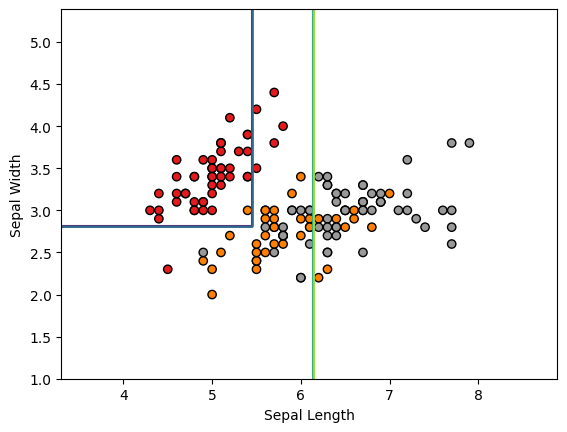

In [90]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='Set1')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [91]:
r = export_text(clf, feature_names=['Sepal Length', 'Sepal Width'])
print(r)

|--- Sepal Length <= 5.45
|   |--- Sepal Width <= 2.80
|   |   |--- class: 1
|   |--- Sepal Width >  2.80
|   |   |--- class: 0
|--- Sepal Length >  5.45
|   |--- Sepal Length <= 6.15
|   |   |--- class: 1
|   |--- Sepal Length >  6.15
|   |   |--- Sepal Length <= 7.05
|   |   |   |--- class: 2
|   |   |--- Sepal Length >  7.05
|   |   |   |--- class: 2



In [92]:
clf.feature_importances_

array([0.83569313, 0.16430687])

## Decision Tree in Regression

In [93]:
from sklearn.tree import DecisionTreeRegressor

# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

X

array([[0.093949  ],
       [0.10109199],
       [0.19593896],
       [0.30112736],
       [0.35518029],
       [0.4356465 ],
       [0.48049204],
       [0.48550638],
       [0.51022405],
       [0.55187571],
       [0.59137213],
       [0.59363859],
       [0.60098281],
       [0.64463149],
       [0.69091476],
       [0.71676644],
       [0.79484792],
       [0.80654759],
       [0.98291181],
       [1.04438378],
       [1.05191281],
       [1.22212796],
       [1.26645801],
       [1.32277806],
       [1.41403481],
       [1.48070099],
       [1.57714175],
       [1.7975395 ],
       [1.81855385],
       [1.84362585],
       [1.91720759],
       [2.0733097 ],
       [2.118274  ],
       [2.18515977],
       [2.18793606],
       [2.19300757],
       [2.28075166],
       [2.30739681],
       [2.33155386],
       [2.34325601],
       [2.60924161],
       [2.6444746 ],
       [2.72441591],
       [2.74406752],
       [2.84022281],
       [2.84216974],
       [2.85098385],
       [3.013

In [94]:
y

array([ 0.63986132,  0.10091989,  0.19468762,  0.29659703,  0.34775941,
        0.67920762,  0.46221556,  0.46665628,  0.48837278,  0.52428539,
        1.86505817,  0.55938079,  0.56545335,  0.60090392,  0.63724242,
        0.07953386,  0.7137571 ,  0.72190243,  0.83211579,  0.86461509,
        0.66856903,  0.93982849,  0.95404544,  0.96940081,  0.98773806,
        1.69977569,  0.99997987,  0.97440371,  0.96946478,  0.96301232,
        0.87085307,  0.87637482,  0.8538402 ,  0.81714055,  0.81553704,
        2.03077013,  0.75839099,  0.74075654,  0.72431392,  0.71619623,
        0.27972095,  0.47689441,  0.40518094,  0.38713765,  0.29682859,
       -0.99291975,  0.28653555,  0.12742837,  0.1170958 ,  0.08102512,
        0.60118508,  0.05338977, -0.05797992, -0.08776485, -0.12363184,
       -0.64182901, -0.19105902, -0.21002125, -0.26432971, -0.33966747,
        0.68378178, -0.52670976, -0.66655347, -0.68104667, -0.68968448,
       -1.37809976, -0.75404581, -0.82112167, -0.85289554, -0.86

In [95]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(56, 1)
(56,)


In [106]:
# Fit a Decision Treee Regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

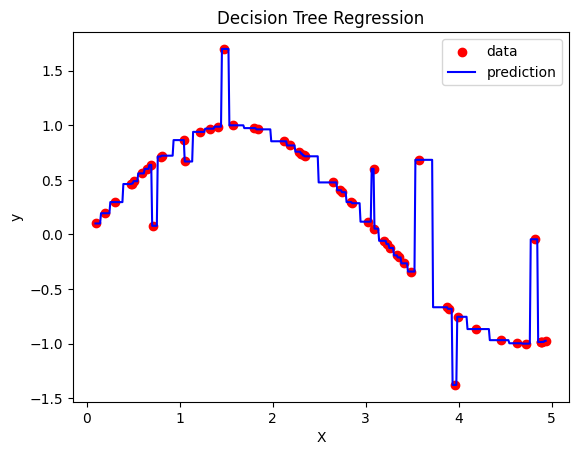

In [107]:
# To plot the regression curve, we'll sort the X Values and predict Y values for the sorted Y
X_grid = np.arange(X[:, 0].min(), X[:, 0].max(), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

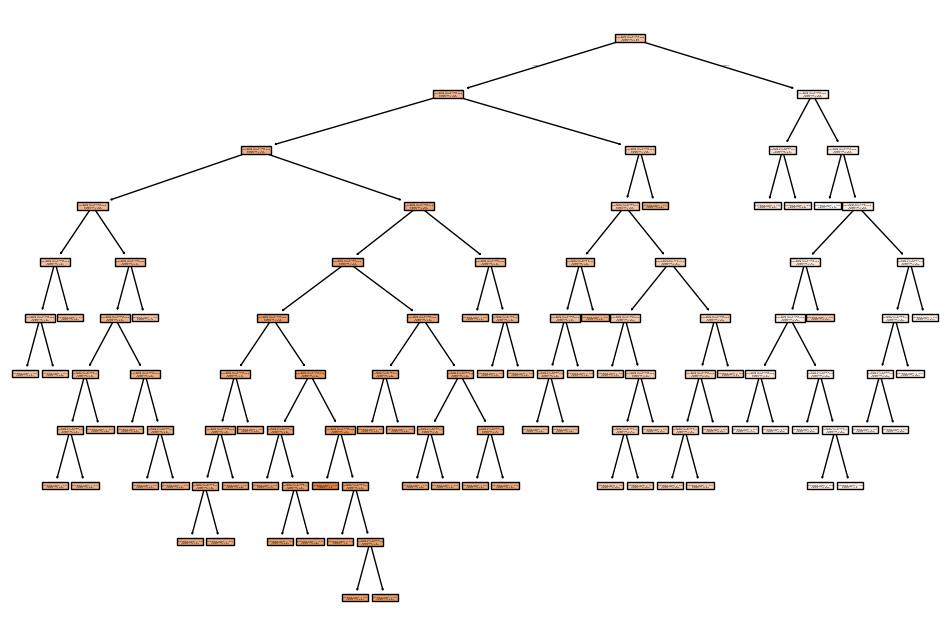

In [111]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()

## Decision Tree on Real World Data